In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup forking to the HTTPS  talserver
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
try: 
    os.mkdir('img_align_celeba')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = '000%03d.jpg' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

You may need to delete the existing 'img_align_celeba' folder in your directory


In [9]:
files = os.listdir('img_align_celeba')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('img_align_celeba', files[90]))
plt.imread(os.path.join('img_align_celeba', files[90]))

files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]

# There should be 100 files, with the last one being number 99

img = plt.imread(files[90])

print(img)

img_align_celeba/000039.jpg
[[[187 192 185]
  [191 196 189]
  [197 204 197]
  ...
  [171 159 163]
  [162 150 152]
  [161 149 151]]

 [[195 196 190]
  [197 198 193]
  [199 201 196]
  ...
  [172 161 165]
  [159 147 151]
  [158 146 150]]

 [[205 197 195]
  [203 198 195]
  [201 197 196]
  ...
  [172 161 165]
  [157 145 149]
  [157 145 149]]

 ...

 [[237 235 240]
  [248 246 251]
  [250 248 253]
  ...
  [235 226 227]
  [243 243 245]
  [243 243 245]]

 [[236 234 239]
  [248 246 251]
  [251 249 254]
  ...
  [230 224 224]
  [242 242 244]
  [242 242 244]]

 [[236 234 239]
  [248 246 251]
  [251 249 254]
  ...
  [229 225 224]
  [242 242 244]
  [242 242 244]]]


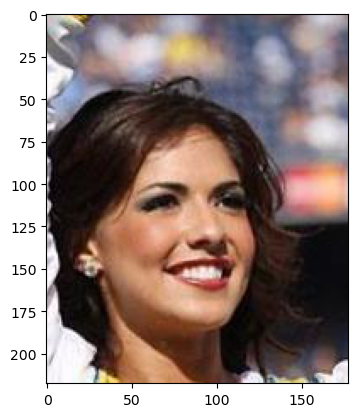

In [8]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

In [10]:
img.shape
# (218, 178, 3)

(218, 178, 3)

In [14]:
imgs = [plt.imread(files[file_i])
        for file_i in range(100)]
imgs[90].shape

(218, 178, 3)

In [15]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")

(100, 218, 178, 3)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


In [16]:
t=img.copy()
red=img.copy()
green=img.copy()
blue=img.copy()
red[:,:,1:3]=0
green[:,:,::2]=0
blue[:,:,:2]=0
fig,ax=plt.subplots(2,2)
fig.set_size_inches(218,178)
ax[0,0].imshow(img)
ax[0,1].imshow(red)
ax[1,0].imshow(green)
ax[1,1].imshow(blue)

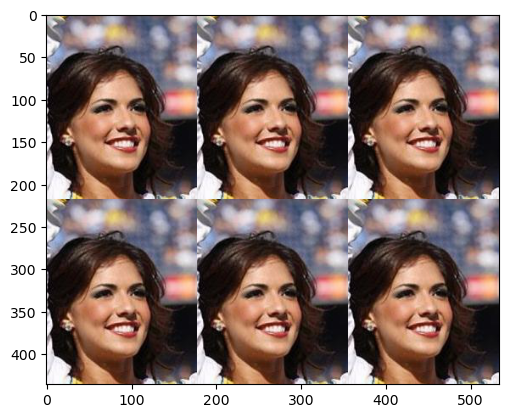

In [19]:
t=img.copy()
# r=np.concatenate((t,t,t),axis=1)
# r=np.concatenate((t,t),axis=0)

# 先水平方向两次，再垂直方向3次
r1=np.concatenate((t,t,t),axis=1)
r2=np.concatenate((r1,r1),axis=0)
plt.imshow(r2)
